<a href="https://colab.research.google.com/github/younhuiji/openCV/blob/main/CV04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시각화 그래프 표현시  
Colab 에서 Matplotlib 폰트 깨짐

In [ ]:
# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
#!apt-get update -qq
! sudo apt-get install fonts-nanum* -qq
!sudo fc-cache -fv


/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 1 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache director

In [ ]:
import matplotlib.font_manager
print(matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf'))


['/usr/share/fonts/truetype/nanum/NanumSquareR.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothic-YetHangul.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo-YetHangul.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoR.ttf'

In [ ]:
# 필요 라이브러리 불러오기
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'NanumBarunGothic'
mpl.rcParams['axes.unicode_minus'] = False
mpl.rc_file_defaults()
!rm -rf ~/.cache/matplotlib/


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


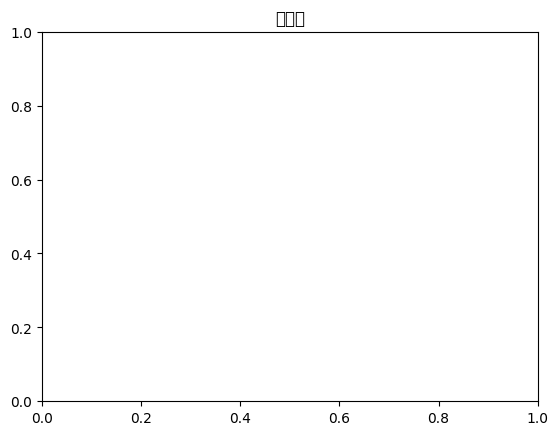

In [ ]:
plt.title('테스트')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#푸리에
- 주기적인 파형에 대해서만 사용할 수 있는 푸리에 급수 전개를, 비주기적인 파형 에 대해서 사용할 수 있는 형태로 변형한 것

- 급수 전개
    - 임의의 주기 함수는, 다양한 주파수의 삼각 함수의 합에 의해 나타낼 수 있음
    - 각각의 삼각함수의 진폭은 삼각함수의 직교성을 이용하면 간단히 구할 수 있음


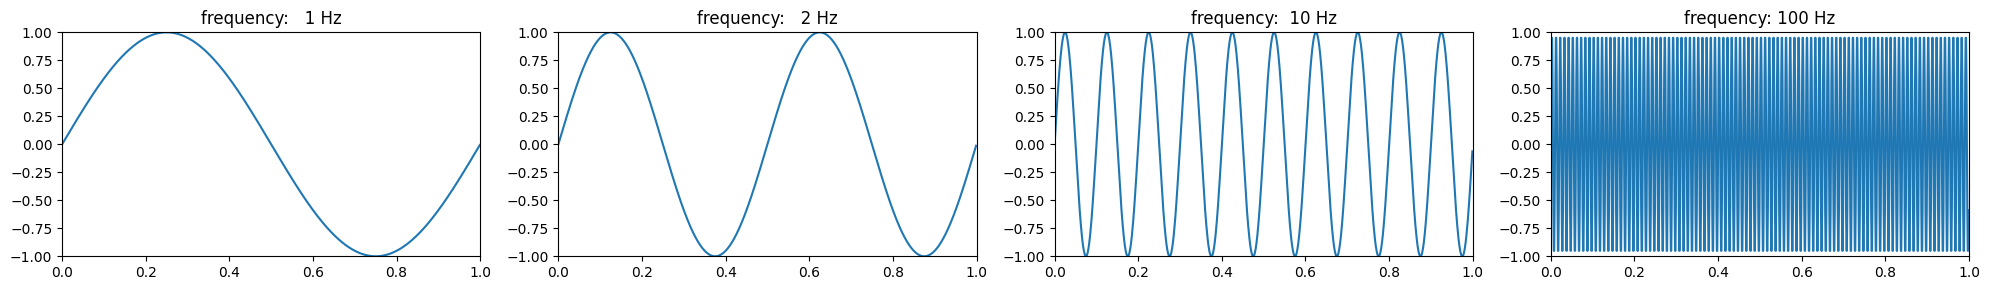

In [ ]:
#Q1) 간단한 공간 주파수를  일반 이미지로 그려서 확인
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0, 1, 0.001)    #시간 벡터 선언

Hz = [1, 2, 10, 100]
res = [np.sin(2 * np.pi * t * h) for h in Hz]

plt.figure(figsize=(20,3))
for i, j in enumerate(res):
    plt.subplot(1,4, i+1), plt.plot(t, j)
    plt.xlim(0, 1),  plt.ylim(-1, 1 )
    plt.title("frequency: %3d Hz" % Hz[i])
plt.tight_layout()
plt.show()

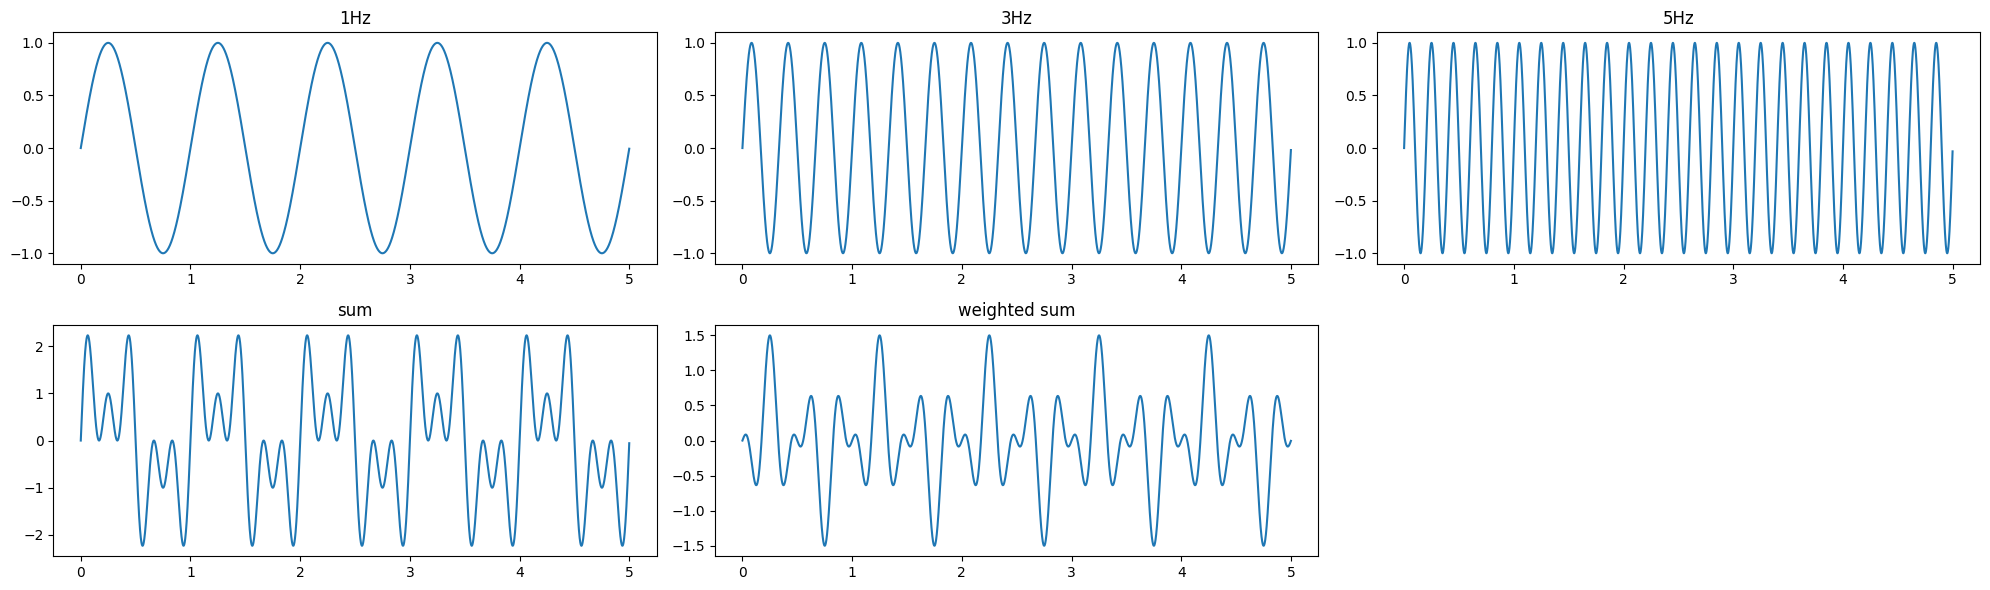

In [ ]:
#Q2) 간단한 공간 주파수를  일반 이미지로 그려서 확인 한 것을 파형의 형태로 표시 해보자.
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0, 5, 0.001)
res = [0]*5


res[0] = np.sin(2 * np.pi * t )
res[1] = np.sin(2 * np.pi * t * 3 )
res[2] = np.sin(2 * np.pi * t * 5 )
res[3] = res[0] + res[1] + res[2]
res[4] = 0.3*res[0] - 0.7 * res[1] + 0.5* res[2]


titles = ['1Hz', '3Hz','5Hz','sum','weighted sum']
plt.figure(figsize=(20,6))
for i, title in enumerate(titles):
    plt.subplot(2, 3, i+1), plt.plot(t, res[i]), plt.title(title)
plt.tight_layout()
plt.show()

 영상을 주파수로 변환하면 ?
 - 주파수는 단위 시간에 몇 번의 변화가 일어났는지를 표현하는 방법.

 - 화소의 밝기로 적용하면 영상에서 화소 밝기의 변화가 얼마나 빨리 변화하는가에 따라서 고주파와 저주파로 분류할 수 있다.


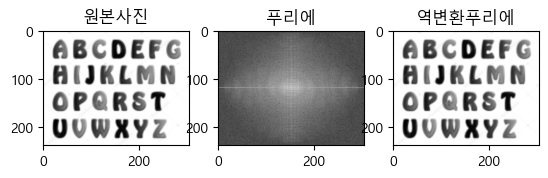

In [ ]:
#Q3)푸리에 확인 -> 영상 확인   pdf 16.p
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib.pyplot as plt
plt.rc("font", family="malgun gothic")


img = cv2.imread('/content/drive/MyDrive/저녁ICT/day08/Letter.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = gray.shape


dft = cv2.dft(np.float32(gray), flags=cv2.DFT_COMPLEX_OUTPUT) #영상을 푸리에 변환시키는 것을 DFT

#주파수가 0인 부분을 정 중앙에 위치시키고, 주파수가 커질수록 가장자리에 위치시킵니다.
dft_shift = np.fft.fftshift(dft) # 주파수 재배열

# dft_shift 된 값들을 2차원 백터 값을 계산 / 지정값이 크기 때문에 log를 사용
res = 20*np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))


#주파수를 반대로 영상에 적용 -> 역 푸리에 변환(Inverse Fourier Transform)
inverse_shift = np.fft.fftshift(dft_shift)  #재배열된 주파수를 원래 배열로 변환
inverse_dft = cv2.dft(inverse_shift, flags=cv2.DFT_INVERSE) #변환된 주파수를 dft함수로  적용 ,flags=cv2.DFT_INVERSE
res02 = cv2.magnitude(inverse_dft[:, :, 0], inverse_dft[:, :, 1]) #영상변환


plt.subplot(131)
plt.imshow(gray, cmap='gray')
plt.title('원본사진')
plt.subplot(132)
plt.imshow(res, cmap='gray')
plt.title('푸리에')
plt.subplot(133)
plt.imshow(res02, cmap='gray')
plt.title('역변환푸리에')
plt.show()

#주파수 확인!
#가운데가 밝은 것을 확인 = 영상이 저주파가 많다는 뜻이며, 밝기의 변화가 급격하게 일어나지 않는다는 뜻


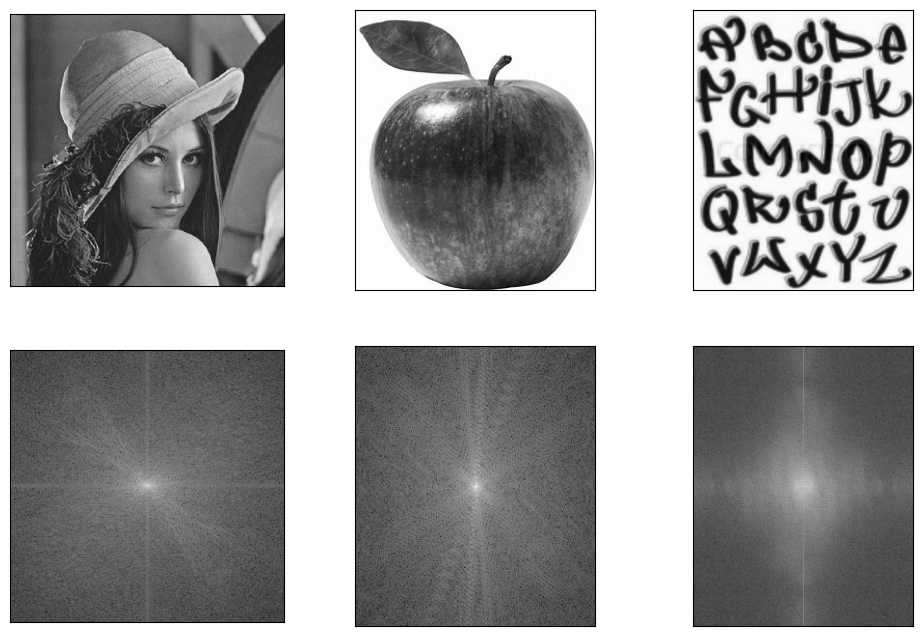

In [ ]:
#Q4) pdf 23.P
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib.pyplot as plt

plt.rc("font", family="malgun gothic")

img = cv2.imread('/content/drive/MyDrive/저녁ICT/day08/Lenna.jpg',0)
img01 = cv2.imread('/content/drive/MyDrive/저녁ICT/day08/apple.jpg',0)
img02 = cv2.imread('/content/drive/MyDrive/저녁ICT/day08/letters.jpg',0)

imgs = [img, img01, img02]

fig, ax = plt.subplots(2, 3, figsize=(12, 8))

for i in range(3):
    dft = cv2.dft(np.float32(imgs[i]), flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)   # pdf 24.p
    magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))

    ax[0][i].imshow(imgs[i], 'gray')
    ax[0][i].set_xticks([])
    ax[0][i].set_yticks([])

    ax[1][i].imshow(magnitude_spectrum, 'gray')
    ax[1][i].set_xticks([])
    ax[1][i].set_yticks([])


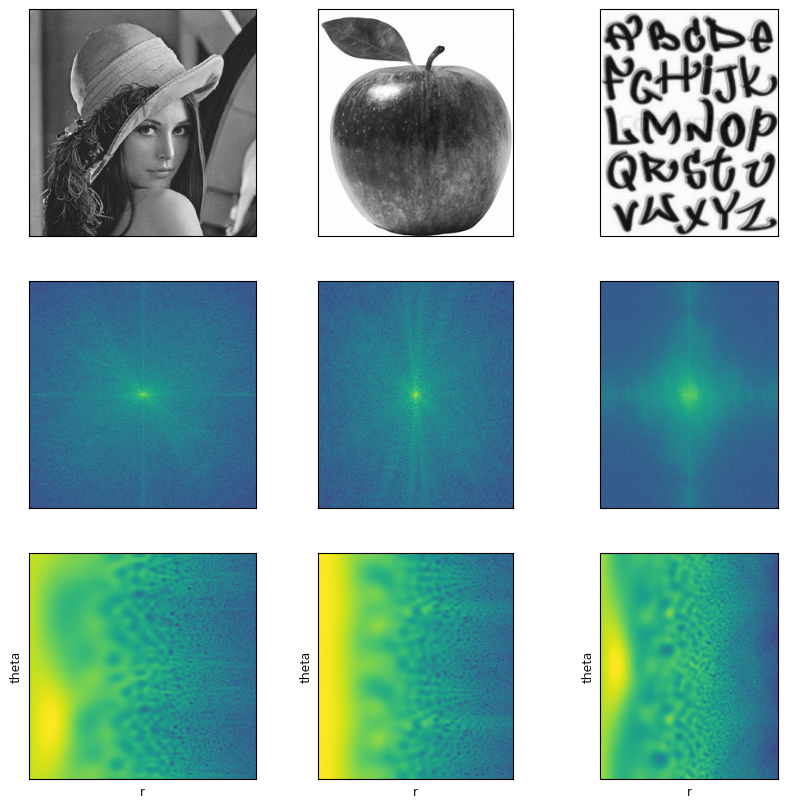

In [ ]:
#Q5)
import numpy as np
import matplotlib.pyplot as plt
import cv2

def make_power_sp(img):
    dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
    return magnitude_spectrum

def make_polar_img(img):
    h = img.shape[0]
    w = img.shape[1]

    l = np.sqrt(w*w + h*h)
    m = l/np.log(l)

    center = (w/2, h/2)
    flags = cv2.INTER_LANCZOS4 + cv2.WARP_POLAR_LOG
    p_a = cv2.warpPolar(img, (w, h), center, m, flags)
    return p_a


img = cv2.imread('/content/drive/MyDrive/저녁ICT/day08/Lenna.jpg',0)
img01 = cv2.imread('/content/drive/MyDrive/저녁ICT/day08/apple.jpg',0)
img02 = cv2.imread('/content/drive/MyDrive/저녁ICT/day08/letters.jpg',0)

imgs = [img, img01, img02]


fig, ax = plt.subplots(3, 3, figsize=(10, 10), subplot_kw=({"xticks":(), "yticks":()}))
for i in range(3):
    ft_img = make_power_sp(imgs[i])
    p_img = make_polar_img(ft_img)

    ax[0][i].imshow(imgs[i], cmap = 'gray')
    ax[1][i].imshow(ft_img, cmap = 'viridis')
    ax[2][i].imshow(p_img, cmap = 'viridis')
    ax[2][i].set_xlabel('r')
    ax[2][i].set_ylabel('theta')

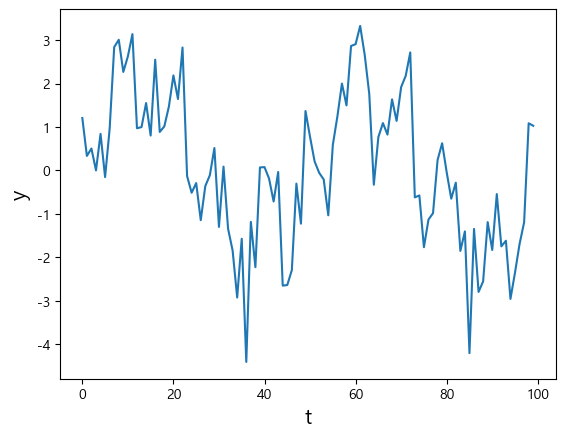

In [ ]:
#ex01)푸리에 공식을 사용한 공식 _시각화

import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
np.random.seed(43)

t = np.arange(100)
y = 2.0 * np.sin(2*np.pi * t / 50) + 1.0 * np.cos(2 * np.pi * t / 10) + 0.8 * np.random.randn(t.shape[0])

plt.plot(t, y);
plt.xlabel('t', fontsize=15);
plt.ylabel('y', fontsize=15);

In [ ]:
#1-1 . 프로그래밍 해서 결과를 리턴받고 싶다. np.fft.fft()
ck = np.fft.fft(y)
print(ck.shape)
print(ck)

(100,)
[ 5.16661036e+00+0.00000000e+00j  5.06615932e-01-5.03501967e+00j
 -2.12936638e+00-9.43551906e+01j  1.98335511e+00-5.61135923e+00j
 -6.15894743e-01-4.33863092e+00j  1.14871744e+01-4.58183639e+00j
 -8.92270251e+00+5.86344294e-01j  4.18170064e+00+4.80600878e+00j
 -5.18401794e+00+4.73643907e+00j -6.37357365e+00+1.28349770e-01j
  5.19969556e+01+2.70598542e+00j -2.88031653e+00+7.14948643e+00j
  5.18209652e+00+1.18470480e+01j  3.91264202e+00-2.68019125e+00j
  1.06206655e+01+5.91905424e+00j  1.09137771e-01-3.20646923e+00j
 -7.94071361e+00+4.17860080e+00j -7.14735971e+00-6.18452332e-01j
  8.06878511e+00+5.94921305e+00j -3.01725506e+00+4.21001845e+00j
 -4.52101899e+00-6.84017818e+00j  1.40586728e+00-5.11794717e-01j
 -6.35198586e+00+1.49069268e+00j  1.46637340e+00+3.74691997e+00j
  7.36744065e-01+3.77455982e+00j  1.87915953e-02+8.49252538e+00j
 -4.19628129e-02+1.04133915e+00j -1.22533678e+00-6.23608078e-01j
  8.88294899e+00+3.75081488e-02j  3.18349526e+00-4.10709079e+00j
 -1.23786896e+00+4

In [ ]:
#1-2 . 결과값이 실수 라면 . np.fft.rfft()
ck = np.fft.rfft(y)
print(ck.shape)
print(ck)

(51,)
[ 5.16661036e+00+0.00000000e+00j  5.06615932e-01-5.03501967e+00j
 -2.12936638e+00-9.43551906e+01j  1.98335511e+00-5.61135923e+00j
 -6.15894743e-01-4.33863092e+00j  1.14871744e+01-4.58183639e+00j
 -8.92270251e+00+5.86344294e-01j  4.18170064e+00+4.80600878e+00j
 -5.18401794e+00+4.73643907e+00j -6.37357365e+00+1.28349770e-01j
  5.19969556e+01+2.70598542e+00j -2.88031653e+00+7.14948643e+00j
  5.18209652e+00+1.18470480e+01j  3.91264202e+00-2.68019125e+00j
  1.06206655e+01+5.91905424e+00j  1.09137771e-01-3.20646923e+00j
 -7.94071361e+00+4.17860080e+00j -7.14735971e+00-6.18452332e-01j
  8.06878511e+00+5.94921305e+00j -3.01725506e+00+4.21001845e+00j
 -4.52101899e+00-6.84017818e+00j  1.40586728e+00-5.11794717e-01j
 -6.35198586e+00+1.49069268e+00j  1.46637340e+00+3.74691997e+00j
  7.36744065e-01+3.77455982e+00j  1.87915953e-02+8.49252538e+00j
 -4.19628129e-02+1.04133915e+00j -1.22533678e+00-6.23608078e-01j
  8.88294899e+00+3.75081488e-02j  3.18349526e+00-4.10709079e+00j
 -1.23786896e+00+4.

In [ ]:
#1-3 값을 확인 해보자 .
y.shape , y.shape[0] , ck.shape, ck[0]  # 입력된 데이터가 실수일 경우 복소수가 리턴

((100,), 100, (51,), (5.166610358385194+0j))

In [ ]:
#1-4. 복소수를 정리해서 시각화 다시 해보자.  pdf 26.p  고속 푸리에 작업
T = y.shape[0]

if  T %2 == 0:
    c = (ck[0].real  + ck[-1].real) /T
    ak = ck[1:-1].real * 2 / T
    bk = -ck[1:-1].imag * 2 / T
else:
    c =ck[0] .real /T
    ak = ck[1:].real *2 / T
    bk= -ck[1:].imag *2 / T


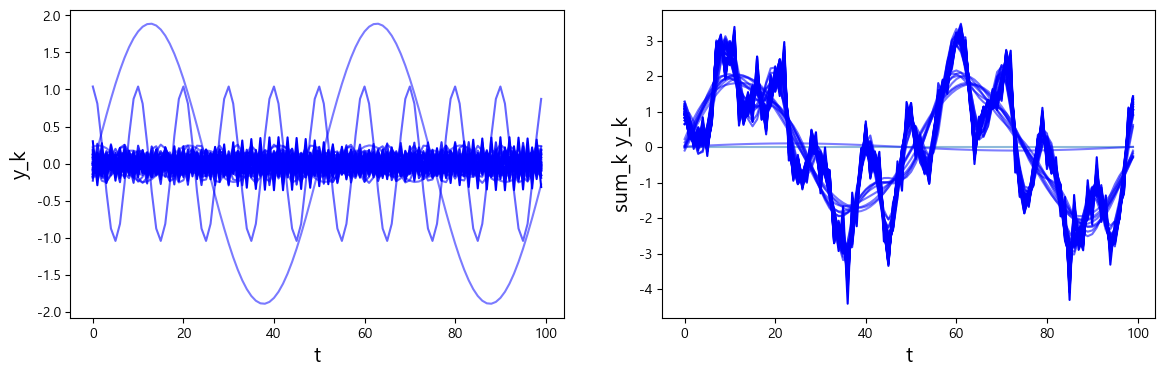

In [ ]:
#1-5  시각화를 해보자 . 노이즈를 확인 하자 .  ak, bk
# 각 주파수 성능과 어느 정도의 누적합을 시각화 해서 노이즈 확인
fig, axes = plt.subplots(1,2, figsize =(14,4))
ax1, ax2 = axes

y_sum  = c * np.ones_like(t)

ax1.plot(y_sum, alpha =0.5)
ax2.plot(y_sum, alpha =0.5)

for k, (a,b) in enumerate(zip(ak, bk) , 1) :
     y_k=b * np.sin(2*np.pi * k / T*t ) + a * np.cos(2 * np.pi * k / T*t)
     y_sum += y_k

     ax1.plot(t, y_k, alpha = k / ak.shape[0]/2+  0.5, color = 'blue')
     ax2.plot(t, y_sum , alpha = k / ak.shape[0]/2+  0.5, color = 'blue')

     ax1.set_ylabel('y_k' , fontsize =15)
     ax2.set_ylabel('sum_k y_k' , fontsize =15)

     ax1.set_xlabel('t', fontsize=15)
     ax2.set_xlabel('t', fontsize=15)

In [ ]:
#1-6 스펙트럼을 사용해 보자.
sf = np.zeros_like(ck.real)
sf

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
sf[0] = (ck[0].real / T)**2
sf[1:-1] = (ak ** 2 + bk ** 2) * 0.5
sf[-1] = (ck[-1].real / T) **2

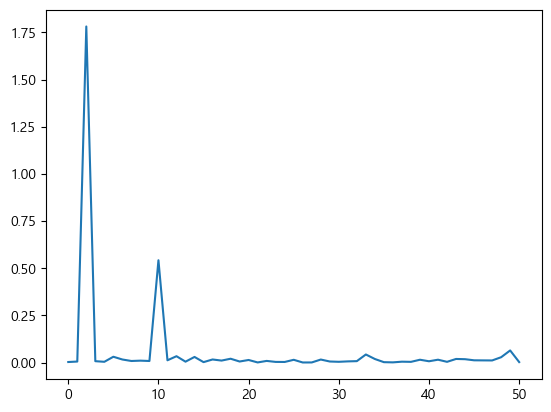

In [ ]:
plt.plot(sf);
